In [1]:
# import necessary libraries for the analysis
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [2]:
## Functions used below are imported from another notebook, run before changing directory

%run overlap_and_range_functions.ipynb

In [3]:
chromband = pd.read_table("/Users/ryanyutian/Desktop/annotation_dataset/chromosome_band_hg38.tsv", \
                        sep = "\t")
chromband

,chrom,chromStart,chromEnd,name,gieStain
0,chr1,0,2300000,p36.33,gneg
1,chr1,2300000,5300000,p36.32,gpos25
2,chr1,5300000,7100000,p36.31,gneg
3,chr1,7100000,9100000,p36.23,gpos25
4,chr1,9100000,12500000,p36.22,gneg
...,...,...,...,...,...
1473,chr22_KI270735v1_random,0,42811,NaN,gneg
1474,chr22_KI270736v1_random,0,181920,NaN,gneg
1475,chr22_KI270737v1_random,0,103838,NaN,gneg
1476,chr22_KI270738v1_random,0,99375,NaN,gneg


In [4]:
def chromband_overlap_func(input_chr, input_start, input_end, input_ind, input_sv_type, input_sample_id, df):
    
    output_df = df[df['chrom'] == input_chr]
    output_df = output_df[(output_df['chromEnd'] >= input_start) & (output_df['chromStart'] <= input_end)]
        
    if len(output_df) != 0:
        
        output_df['percent_overlap'] = output_df.apply(lambda row: \
                                                 percent_overlap(input_start, input_end, row['chromStart'], row['chromEnd']), axis=1)

        output_df['input_start'] = input_start
        output_df['input_end'] = input_end
        output_df['input_ind'] = input_ind
        output_df['input_sv_type'] = input_sv_type
        output_df['input_sample_id'] = input_sample_id
        
    
    return output_df

# Small dels

In [5]:
### Load filtered somatic small deletions ###

##
somatic_small_del_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_glioma_sv_processed/somatic_panel_wo_gap_wo_highoverlap/small_dels'

somatic_small_del_wo_highoverlap_df_names = []

os.chdir(somatic_small_del_path)
temp_files = sorted([i for i in os.listdir(somatic_small_del_path) if 'DS' not in i])

for file_name in temp_files:
    
    globals()[file_name[:-4]] = pd.read_csv(file_name)
    somatic_small_del_wo_highoverlap_df_names.append(file_name[:-4])

In [ ]:
small_del_gene_list_names = []

for small_del_df_name in somatic_small_del_wo_highoverlap_df_names:
    
    print('Currently analyzing: ' + small_del_df_name[:-41])
    temp_df = globals()[small_del_df_name]
    temp_output_df = pd.DataFrame()
    
    for index, row in temp_df.iterrows():
        
        temp_overlap = overlap_func(row['CHROM'], row['POS'], row['END'], index, \
                                    'del', small_del_df_name[:-41], chromband)
        temp_output_df = temp_output_df.append(temp_overlap)
    
    temp_gene_list_name = small_del_df_name[:-41] + '_small_del_gene_list'
    small_del_gene_list_names.append(temp_gene_list_name)
    
    globals()[temp_gene_list_name] = temp_output_df

In [7]:
small_del_gene_list_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_gene_list/all/small_dels/'

for df_name in small_del_gene_list_names:
    
    temp_df = globals()[df_name]
    temp_df.to_csv((small_del_gene_list_path + df_name + '.csv'), index=False, sep=',')

# Large dels

In [9]:
## DELs
somatic_large_DEL_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_glioma_sv_processed/somatic_panel_final/large_svs/DEL'

somatic_large_DEL_wo_highoverlap_df_names = []

os.chdir(somatic_large_DEL_path)
temp_files = sorted([i for i in os.listdir(somatic_large_DEL_path) if 'DS' not in i])

for file_name in temp_files:
    
    globals()[file_name[:-4]] = pd.read_csv(file_name)
    somatic_large_DEL_wo_highoverlap_df_names.append(file_name[:-4])

In [10]:
large_del_chromband_list_names = []

for large_del_df_name in somatic_large_DEL_wo_highoverlap_df_names:
    
    print('Currently analyzing: ' + large_del_df_name[:-44])
    temp_df = globals()[large_del_df_name]
    temp_output_df = pd.DataFrame()
    
    for index, row in temp_df.iterrows():
        
        temp_overlap = chromband_overlap_func(row['CHROM'], row['POS'], row['END'], index, \
                                              'DEL', large_del_df_name[:-44], chromband)
        temp_output_df = temp_output_df.append(temp_overlap)
    
    temp_chromband_list_name = large_del_df_name[:-44] + '_large_del_chromband_list'
    large_del_chromband_list_names.append(temp_chromband_list_name)
    
    globals()[temp_chromband_list_name] = temp_output_df

Currently analyzing: A_RR_GBM809
Currently analyzing: A_R_GBM607
Currently analyzing: B_P_GBM593
Currently analyzing: B_R_GBM898
Currently analyzing: C_P_GBM577
Currently analyzing: C_R_GBM625
Currently analyzing: E_RR_GBM937
Currently analyzing: E_R_GBM781
Currently analyzing: F_P_GBM620
Currently analyzing: F_R_GBM691
Currently analyzing: G_P_GBM454
Currently analyzing: G_R_GBM833
Currently analyzing: H_P_GBM460
Currently analyzing: H_R_GBM492
Currently analyzing: I_P_GBM440
Currently analyzing: I_R_GBM532
Currently analyzing: J_P_GBM401
Currently analyzing: J_RR_GBM551
Currently analyzing: J_R_GBM498
Currently analyzing: K_P_GBM529
Currently analyzing: K_R_GBM832
Currently analyzing: L_P_GBM618
Currently analyzing: L_R_SMTB152
Currently analyzing: M_P_GBM672
Currently analyzing: M_R_GBM828
Currently analyzing: N_P_BT2013110
Currently analyzing: N_R_GBM745
Currently analyzing: O_P_GBM703
Currently analyzing: O_R_SMTB781
Currently analyzing: P_P_SMTB123
Currently analyzing: P_R_SMTB26

In [11]:
large_del_chromband_list_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_gene_list/chromband/large_svs/DEL/'

for df_name in large_del_chromband_list_names:
    
    temp_df = globals()[df_name]
    temp_df.to_csv((large_del_chromband_list_path + df_name + '.csv'), index=False, sep=',')

# Large dups

In [11]:
## DUPs
somatic_large_DUP_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_glioma_sv_processed/somatic_panel_final/large_svs/DUP'

somatic_large_DUP_wo_highoverlap_df_names = []

os.chdir(somatic_large_DUP_path)
temp_files = sorted([i for i in os.listdir(somatic_large_DUP_path) if 'DS' not in i])

for file_name in temp_files:
    
    globals()[file_name[:-4]] = pd.read_csv(file_name)
    somatic_large_DUP_wo_highoverlap_df_names.append(file_name[:-4])

In [12]:
large_dup_chromband_list_names = []

for large_dup_df_name in somatic_large_DUP_wo_highoverlap_df_names:
    
    print('Currently analyzing: ' + large_dup_df_name[:-44])
    temp_df = globals()[large_dup_df_name]
    temp_output_df = pd.DataFrame()
    
    for index, row in temp_df.iterrows():
        
        temp_overlap = chromband_overlap_func(row['CHROM'], row['POS'], row['END'], index, \
                                              'DUP', large_dup_df_name[:-44], chromband)
        temp_output_df = temp_output_df.append(temp_overlap)
    
    temp_chromband_list_name = large_dup_df_name[:-44] + '_large_dup_chromband_list'
    large_dup_chromband_list_names.append(temp_chromband_list_name)
    
    globals()[temp_chromband_list_name] = temp_output_df

Currently analyzing: A_RR_GBM809
Currently analyzing: A_R_GBM607
Currently analyzing: B_P_GBM593
Currently analyzing: B_R_GBM898
Currently analyzing: C_P_GBM577
Currently analyzing: C_R_GBM625
Currently analyzing: E_RR_GBM937
Currently analyzing: E_R_GBM781
Currently analyzing: F_P_GBM620
Currently analyzing: F_R_GBM691
Currently analyzing: G_P_GBM454
Currently analyzing: G_R_GBM833
Currently analyzing: H_P_GBM460
Currently analyzing: H_R_GBM492
Currently analyzing: I_P_GBM440
Currently analyzing: I_R_GBM532
Currently analyzing: J_P_GBM401
Currently analyzing: J_RR_GBM551
Currently analyzing: J_R_GBM498
Currently analyzing: K_P_GBM529
Currently analyzing: K_R_GBM832
Currently analyzing: L_P_GBM618
Currently analyzing: L_R_SMTB152
Currently analyzing: M_P_GBM672
Currently analyzing: M_R_GBM828
Currently analyzing: N_P_BT2013110
Currently analyzing: N_R_GBM745
Currently analyzing: O_P_GBM703
Currently analyzing: O_R_SMTB781
Currently analyzing: P_P_SMTB123
Currently analyzing: P_R_SMTB26

In [14]:
large_dup_chromband_list_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_gene_list/chromband/large_svs/DUP/'

for df_name in large_dup_chromband_list_names:
    
    temp_df = globals()[df_name]
    temp_df.to_csv((large_dup_chromband_list_path + df_name + '.csv'), index=False, sep=',')

# Large invs

In [13]:
## INVs
somatic_large_INV_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_glioma_sv_processed/somatic_panel_final/large_svs/INV'

somatic_large_INV_wo_highoverlap_df_names = []

os.chdir(somatic_large_INV_path)
temp_files = sorted([i for i in os.listdir(somatic_large_INV_path) if 'DS' not in i])

for file_name in temp_files:
    
    globals()[file_name[:-4]] = pd.read_csv(file_name)
    somatic_large_INV_wo_highoverlap_df_names.append(file_name[:-4])

In [14]:
large_inv_chromband_list_names = []

for large_inv_df_name in somatic_large_INV_wo_highoverlap_df_names:
    
    print('Currently analyzing: ' + large_inv_df_name[:-44])
    temp_df = globals()[large_inv_df_name]
    temp_output_df = pd.DataFrame()
    
    for index, row in temp_df.iterrows():
        
        temp_overlap = chromband_overlap_func(row['CHROM'], row['POS'], row['END'], index, \
                                              'INV', large_inv_df_name[:-44], chromband)
        temp_output_df = temp_output_df.append(temp_overlap)
    
    temp_chromband_list_name = large_inv_df_name[:-44] + '_large_inv_chromband_list'
    large_inv_chromband_list_names.append(temp_chromband_list_name)
    
    globals()[temp_chromband_list_name] = temp_output_df

Currently analyzing: A_RR_GBM809
Currently analyzing: A_R_GBM607
Currently analyzing: B_P_GBM593
Currently analyzing: B_R_GBM898
Currently analyzing: C_P_GBM577
Currently analyzing: C_R_GBM625
Currently analyzing: E_RR_GBM937
Currently analyzing: E_R_GBM781
Currently analyzing: F_P_GBM620
Currently analyzing: F_R_GBM691
Currently analyzing: G_P_GBM454
Currently analyzing: G_R_GBM833
Currently analyzing: H_P_GBM460
Currently analyzing: H_R_GBM492
Currently analyzing: I_P_GBM440
Currently analyzing: I_R_GBM532
Currently analyzing: J_P_GBM401
Currently analyzing: J_RR_GBM551
Currently analyzing: J_R_GBM498
Currently analyzing: K_P_GBM529
Currently analyzing: K_R_GBM832
Currently analyzing: L_P_GBM618
Currently analyzing: L_R_SMTB152
Currently analyzing: M_P_GBM672
Currently analyzing: M_R_GBM828
Currently analyzing: N_P_BT2013110
Currently analyzing: N_R_GBM745
Currently analyzing: O_P_GBM703
Currently analyzing: O_R_SMTB781
Currently analyzing: P_P_SMTB123
Currently analyzing: P_R_SMTB26

In [17]:
large_inv_chromband_list_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_gene_list/chromband/large_svs/INV/'

for df_name in large_inv_chromband_list_names:
    
    temp_df = globals()[df_name]
    temp_df.to_csv((large_inv_chromband_list_path + df_name + '.csv'), index=False, sep=',')

In [15]:
large_del_chromband_list_names[0][:-25]

'A_RR_GBM809'

In [16]:
'q13.42' not in A_R_GBM607_large_del_chromband_list['name'].tolist()

False

In [17]:
A_R_GBM607_large_del_chromband_list

,chrom,chromStart,chromEnd,name,gieStain,percent_overlap,input_start,input_end,input_ind,input_sv_type,input_sample_id
811,chr19,53100000,55800000,q13.42,gneg,1.72,54786240,54832710,0,DEL,A_R_GBM607
343,chr7,53900000,58100000,p11.2,gneg,0.72,58037105,58067175,1,DEL,A_R_GBM607


# Overlap

In [18]:
output_dict_large_del = {'chrom':[], 'chromStart':[], 'chromEnd':[], \
                         'name':[], 'gieStain':[], 'input_sample_ids':[], 'count':[]}

for df_name in large_del_chromband_list_names:
    
    print('Currently analyzing sample: ' + str(df_name[:-25]))

    temp_df = globals()[df_name]
    
    # For each sample, each chromband can only be counted once
    # (i.e., multiple SVs on the same chromband will only be counted once)
    
    counted_chrombands = []
    
    for ind, row in temp_df.iterrows():
        
        if row['name'] not in output_dict_large_del['name']:
            
            output_dict_large_del['chrom'].append(row['chrom'])
            output_dict_large_del['chromStart'].append(row['chromStart'])
            output_dict_large_del['chromEnd'].append(row['chromEnd'])
            output_dict_large_del['name'].append(row['name'])
            output_dict_large_del['gieStain'].append(row['gieStain'])
            
            output_dict_large_del['input_sample_ids'].append([df_name[:-25]])
            output_dict_large_del['count'].append(1)

            # Append into temp arrays for this sample
            counted_chrombands.append(row['name'])
        
        elif row['name'] not in counted_chrombands:
                
            temp_ind = output_dict_large_del['name'].index(row['name'])

            output_dict_large_del['input_sample_ids'][temp_ind].append(df_name[:-25])

            output_dict_large_del['count'][temp_ind] += 1
            counted_chrombands.append(row['name'])
                

Currently analyzing sample: A_RR_GBM809
Currently analyzing sample: A_R_GBM607
Currently analyzing sample: B_P_GBM593
Currently analyzing sample: B_R_GBM898
Currently analyzing sample: C_P_GBM577
Currently analyzing sample: C_R_GBM625
Currently analyzing sample: E_RR_GBM937
Currently analyzing sample: E_R_GBM781
Currently analyzing sample: F_P_GBM620
Currently analyzing sample: F_R_GBM691
Currently analyzing sample: G_P_GBM454
Currently analyzing sample: G_R_GBM833
Currently analyzing sample: H_P_GBM460
Currently analyzing sample: H_R_GBM492
Currently analyzing sample: I_P_GBM440
Currently analyzing sample: I_R_GBM532
Currently analyzing sample: J_P_GBM401
Currently analyzing sample: J_RR_GBM551
Currently analyzing sample: J_R_GBM498
Currently analyzing sample: K_P_GBM529
Currently analyzing sample: K_R_GBM832
Currently analyzing sample: L_P_GBM618
Currently analyzing sample: L_R_SMTB152
Currently analyzing sample: M_P_GBM672
Currently analyzing sample: M_R_GBM828
Currently analyzing s

In [19]:
output_dict_large_dup = {'chrom':[], 'chromStart':[], 'chromEnd':[], \
                         'name':[], 'gieStain':[], 'input_sample_ids':[], 'count':[]}

for df_name in large_dup_chromband_list_names:
    
    print('Currently analyzing sample: ' + str(df_name[:-25]))

    temp_df = globals()[df_name]
    
    # For each sample, each chromband can only be counted once
    # (i.e., multiple SVs on the same chromband will only be counted once)
    
    counted_chrombands = []
    
    for ind, row in temp_df.iterrows():
        
        if row['name'] not in output_dict_large_dup['name']:
            
            output_dict_large_dup['chrom'].append(row['chrom'])
            output_dict_large_dup['chromStart'].append(row['chromStart'])
            output_dict_large_dup['chromEnd'].append(row['chromEnd'])
            output_dict_large_dup['name'].append(row['name'])
            output_dict_large_dup['gieStain'].append(row['gieStain'])
            
            output_dict_large_dup['input_sample_ids'].append([df_name[:-25]])
            output_dict_large_dup['count'].append(1)

            # Append into temp arrays for this sample
            counted_chrombands.append(row['name'])
        
        elif row['name'] not in counted_chrombands:
                
            temp_ind = output_dict_large_dup['name'].index(row['name'])

            output_dict_large_dup['input_sample_ids'][temp_ind].append(df_name[:-25])

            output_dict_large_dup['count'][temp_ind] += 1
            counted_chrombands.append(row['name'])
                

Currently analyzing sample: A_RR_GBM809
Currently analyzing sample: A_R_GBM607
Currently analyzing sample: B_P_GBM593
Currently analyzing sample: B_R_GBM898
Currently analyzing sample: C_P_GBM577
Currently analyzing sample: C_R_GBM625
Currently analyzing sample: E_RR_GBM937
Currently analyzing sample: E_R_GBM781
Currently analyzing sample: F_P_GBM620
Currently analyzing sample: F_R_GBM691
Currently analyzing sample: G_P_GBM454
Currently analyzing sample: G_R_GBM833
Currently analyzing sample: H_P_GBM460
Currently analyzing sample: H_R_GBM492
Currently analyzing sample: I_P_GBM440
Currently analyzing sample: I_R_GBM532
Currently analyzing sample: J_P_GBM401
Currently analyzing sample: J_RR_GBM551
Currently analyzing sample: J_R_GBM498
Currently analyzing sample: K_P_GBM529
Currently analyzing sample: K_R_GBM832
Currently analyzing sample: L_P_GBM618
Currently analyzing sample: L_R_SMTB152
Currently analyzing sample: M_P_GBM672
Currently analyzing sample: M_R_GBM828
Currently analyzing s

In [20]:
output_dict_large_inv = {'chrom':[], 'chromStart':[], 'chromEnd':[], \
                         'name':[], 'gieStain':[], 'input_sample_ids':[], 'count':[]}

for df_name in large_inv_chromband_list_names:
    
    print('Currently analyzing sample: ' + str(df_name[:-25]))

    temp_df = globals()[df_name]
    
    # For each sample, each chromband can only be counted once
    # (i.e., multiple SVs on the same chromband will only be counted once)
    
    counted_chrombands = []
    
    for ind, row in temp_df.iterrows():
        
        if row['name'] not in output_dict_large_inv['name']:
            
            output_dict_large_inv['chrom'].append(row['chrom'])
            output_dict_large_inv['chromStart'].append(row['chromStart'])
            output_dict_large_inv['chromEnd'].append(row['chromEnd'])
            output_dict_large_inv['name'].append(row['name'])
            output_dict_large_inv['gieStain'].append(row['gieStain'])
            
            output_dict_large_inv['input_sample_ids'].append([df_name[:-25]])
            output_dict_large_inv['count'].append(1)

            # Append into temp arrays for this sample
            counted_chrombands.append(row['name'])
        
        elif row['name'] not in counted_chrombands:
                
            temp_ind = output_dict_large_inv['name'].index(row['name'])

            output_dict_large_inv['input_sample_ids'][temp_ind].append(df_name[:-25])

            output_dict_large_inv['count'][temp_ind] += 1
            counted_chrombands.append(row['name'])
                

Currently analyzing sample: A_RR_GBM809
Currently analyzing sample: A_R_GBM607
Currently analyzing sample: B_P_GBM593
Currently analyzing sample: B_R_GBM898
Currently analyzing sample: C_P_GBM577
Currently analyzing sample: C_R_GBM625
Currently analyzing sample: E_RR_GBM937
Currently analyzing sample: E_R_GBM781
Currently analyzing sample: F_P_GBM620
Currently analyzing sample: F_R_GBM691
Currently analyzing sample: G_P_GBM454
Currently analyzing sample: G_R_GBM833
Currently analyzing sample: H_P_GBM460
Currently analyzing sample: H_R_GBM492
Currently analyzing sample: I_P_GBM440
Currently analyzing sample: I_R_GBM532
Currently analyzing sample: J_P_GBM401
Currently analyzing sample: J_RR_GBM551
Currently analyzing sample: J_R_GBM498
Currently analyzing sample: K_P_GBM529
Currently analyzing sample: K_R_GBM832
Currently analyzing sample: L_P_GBM618
Currently analyzing sample: L_R_SMTB152
Currently analyzing sample: M_P_GBM672
Currently analyzing sample: M_R_GBM828
Currently analyzing s

In [21]:
output_df_large_del = pd.DataFrame.from_dict(output_dict_large_del)

output_df_large_dup = pd.DataFrame.from_dict(output_dict_large_dup)

output_df_large_inv = pd.DataFrame.from_dict(output_dict_large_inv)

In [26]:
output_df_large_del_sorted = output_df_large_del.sort_values('count', ascending=False)
output_df_large_del_sorted = output_df_large_del_sorted.reset_index(drop=True)

large_del_chromband_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_SV_hotspot/chrombands/'
output_df_large_del_sorted.to_csv((large_del_chromband_path + 'large_del_chromband_hotspot.csv'), index=False, sep=',')

In [27]:
output_df_large_dup_sorted = output_df_large_dup.sort_values('count', ascending=False)
output_df_large_dup_sorted = output_df_large_dup_sorted.reset_index(drop=True)

large_dup_chromband_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_SV_hotspot/chrombands/'
output_df_large_dup_sorted.to_csv((large_dup_chromband_path + 'large_dup_chromband_hotspot.csv'), index=False, sep=',')

In [28]:
output_df_large_inv_sorted = output_df_large_inv.sort_values('count', ascending=False)
output_df_large_inv_sorted = output_df_large_inv_sorted.reset_index(drop=True)

large_inv_chromband_path = '/Users/ryanyutian/Desktop/new_panel_TRI_Brain_SV_hotspot/chrombands/'
output_df_large_inv_sorted.to_csv((large_inv_chromband_path + 'large_inv_chromband_hotspot.csv'), index=False, sep=',')

# Visualization

In [29]:
def count_elements(numbers):
    
    count_dict = {}
    
    for num in numbers:
    
        if num in count_dict:
            count_dict[num] += 1
        
        else:
            count_dict[num] = 1

    return count_dict

In [30]:
### Large DELs

output_df_large_del_sorted_bigger_than_1 = \
output_df_large_del_sorted[output_df_large_del_sorted['count'] > 1]

In [41]:
list(output_df_large_del_sorted_bigger_than_1[output_df_large_del_sorted_bigger_than_1['name'] == 'q21.1']['input_sample_ids'])

[['A_RR_GBM809',
  'B_P_GBM593',
  'C_P_GBM577',
  'E_R_GBM781',
  'F_P_GBM620',
  'F_R_GBM691',
  'H_P_GBM460',
  'H_R_GBM492',
  'I_P_GBM440',
  'J_P_GBM401',
  'J_RR_GBM551',
  'J_R_GBM498',
  'K_P_GBM529',
  'K_R_GBM832',
  'L_R_SMTB152',
  'N_P_BT2013110',
  'O_P_GBM703',
  'O_R_SMTB781',
  'P_P_SMTB123',
  'X_R_GBM945',
  'X_R_SMTB241',
  'X_R_SMTB814']]

In [47]:
B_P_GBM593_large_del_chromband_list

,chrom,chromStart,chromEnd,name,gieStain,percent_overlap,input_start,input_end,input_ind,input_sv_type,input_sample_id
36,chr1,143200000,147500000,q21.1,gneg,2.56,145290000,145400000,0,DEL,B_P_GBM593
587,chr12,10000000,12600000,p13.2,gpos75,2.12,11015379,11070480,1,DEL,B_P_GBM593
641,chr13,46700000,50300000,q14.2,gpos50,44.44,48700000,50570000,2,DEL,B_P_GBM593
642,chr13,50300000,54700000,q14.3,gneg,6.14,48700000,50570000,2,DEL,B_P_GBM593
672,chr14,43000000,46700000,q21.2,gneg,1.04,46372417,46410766,3,DEL,B_P_GBM593
326,chr6,164100000,170805979,q27,gneg,3.43,170410000,170640000,4,DEL,B_P_GBM593
328,chr7,2800000,4500000,p22.2,gpos25,3.34,3338734,3395585,5,DEL,B_P_GBM593
366,chr7,138500000,143400000,q34,gneg,0.68,142309916,142343384,6,DEL,B_P_GBM593
455,chrX,0,4400000,p22.33,gneg,2.50,1310000,1420000,7,DEL,B_P_GBM593


In [42]:
output_df_large_del_sorted_bigger_than_1[output_df_large_del_sorted_bigger_than_1['count'] == 16]

,chrom,chromStart,chromEnd,name,gieStain,input_sample_ids,count
1,chr15,20500000,25500000,q11.2,gneg,"[C_P_GBM577, H_P_GBM460, H_R_GBM492, J_RR_GBM5...",16
2,chr7,138500000,143400000,q34,gneg,"[B_P_GBM593, C_P_GBM577, C_R_GBM625, E_RR_GBM9...",16
3,chr14,43000000,46700000,q21.2,gneg,"[B_P_GBM593, B_R_GBM898, C_P_GBM577, H_P_GBM46...",16


In [43]:
list(output_df_large_del_sorted_bigger_than_1[output_df_large_del_sorted_bigger_than_1['name'] == 'q11.2']['input_sample_ids'])

[['C_P_GBM577',
  'H_P_GBM460',
  'H_R_GBM492',
  'J_RR_GBM551',
  'J_R_GBM498',
  'K_P_GBM529',
  'K_R_GBM832',
  'L_R_SMTB152',
  'M_R_GBM828',
  'N_P_BT2013110',
  'N_R_GBM745',
  'P_P_SMTB123',
  'X_R_GBM945',
  'X_R_SMTB135',
  'X_R_SMTB241',
  'X_R_SMTB814']]

In [31]:
count_elements(list(output_df_large_del_sorted_bigger_than_1['count']))

{22: 1,
 16: 3,
 15: 4,
 14: 1,
 13: 5,
 12: 5,
 11: 8,
 10: 6,
 9: 12,
 8: 5,
 7: 14,
 6: 7,
 5: 19,
 4: 20,
 3: 30,
 2: 32}

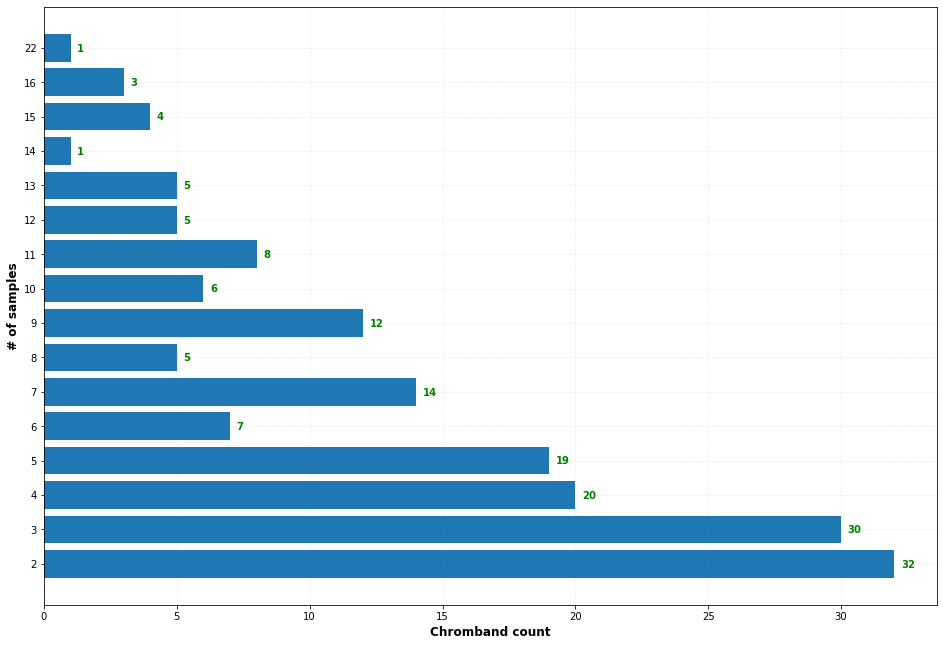

In [32]:
repeat_counts = count_elements(list(output_df_large_del_sorted_bigger_than_1['count']))

sorted_labels = sorted(repeat_counts)
plot_list = []

for label in sorted_labels:
    
    plot_list.append(repeat_counts[label])

sorted_labels_str = [str(x) for x in sorted_labels]
fig, ax = plt.subplots(figsize =(16, 11))

_ = ax.barh(sorted_labels_str, plot_list)
_ = ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+.25, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='green')
    
_ = ax.set_xlabel('Chromband count', fontweight ='bold', fontsize=12)
_ = ax.set_ylabel('# of samples', fontweight ='bold', fontsize=12)

fig.savefig('/Users/ryanyutian/Desktop/visualizations/large_del_chromband_repeats.png', bbox_inches='tight', dpi=150)

In [33]:
### Large DUPs

output_df_large_dup_sorted_bigger_than_1 = \
output_df_large_dup_sorted[output_df_large_dup_sorted['count'] > 1]

In [34]:
count_elements(list(output_df_large_dup_sorted_bigger_than_1['count']))

{33: 1,
 32: 1,
 26: 2,
 25: 1,
 24: 1,
 23: 1,
 21: 6,
 19: 2,
 18: 1,
 17: 3,
 16: 6,
 15: 3,
 14: 8,
 13: 8,
 12: 8,
 11: 5,
 10: 6,
 9: 4,
 8: 6,
 7: 7,
 6: 12,
 5: 11,
 4: 18,
 3: 17,
 2: 36}

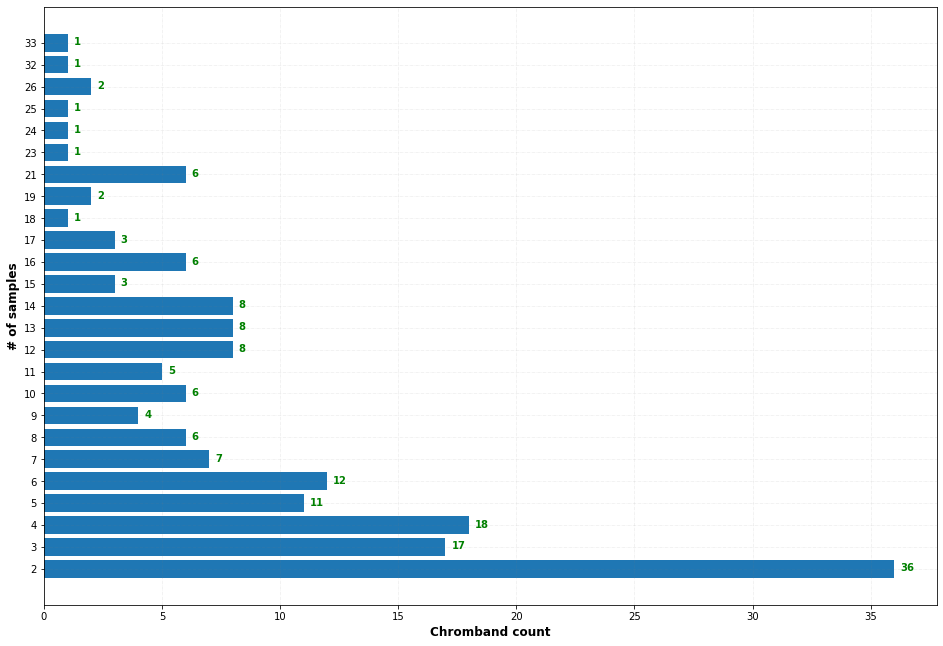

In [35]:
repeat_counts = count_elements(list(output_df_large_dup_sorted_bigger_than_1['count']))

sorted_labels = sorted(repeat_counts)
plot_list = []

for label in sorted_labels:
    
    plot_list.append(repeat_counts[label])

sorted_labels_str = [str(x) for x in sorted_labels]
fig, ax = plt.subplots(figsize =(16, 11))

_ = ax.barh(sorted_labels_str, plot_list)
_ = ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+.25, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='green')
    
_ = ax.set_xlabel('Chromband count', fontweight ='bold', fontsize=12)
_ = ax.set_ylabel('# of samples', fontweight ='bold', fontsize=12)

fig.savefig('/Users/ryanyutian/Desktop/visualizations/large_dup_chromband_repeats.png', bbox_inches='tight', dpi=150)

In [36]:
### Large INVs

output_df_large_inv_sorted_bigger_than_1 = \
output_df_large_inv_sorted[output_df_large_inv_sorted['count'] > 1]

In [37]:
count_elements(list(output_df_large_inv_sorted_bigger_than_1['count']))

{15: 1, 11: 1, 9: 1, 8: 3, 7: 3, 6: 3, 5: 5, 4: 4, 3: 15, 2: 20}

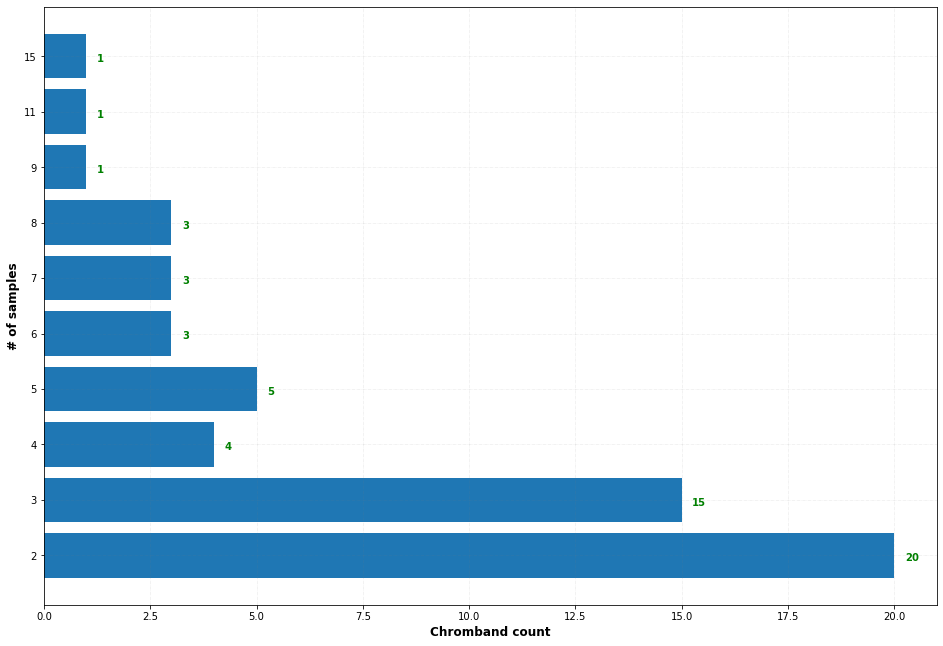

In [38]:
repeat_counts = count_elements(list(output_df_large_inv_sorted_bigger_than_1['count']))

sorted_labels = sorted(repeat_counts)
plot_list = []

for label in sorted_labels:
    
    plot_list.append(repeat_counts[label])

sorted_labels_str = [str(x) for x in sorted_labels]
fig, ax = plt.subplots(figsize =(16, 11))

_ = ax.barh(sorted_labels_str, plot_list)
_ = ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 0.5,
            alpha = 0.2)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+.25, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='green')
    
_ = ax.set_xlabel('Chromband count', fontweight ='bold', fontsize=12)
_ = ax.set_ylabel('# of samples', fontweight ='bold', fontsize=12)

fig.savefig('/Users/ryanyutian/Desktop/visualizations/large_inv_chromband_repeats.png', bbox_inches='tight', dpi=150)